In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import classification_report
from ISLP import load_data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Boston = load_data("Boston")
D = Boston.drop('medv', axis=1)
feature_names = list(D.columns)

X = Boston.drop('medv', axis=1)  
y = Boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Criar o histograma de 'medv'

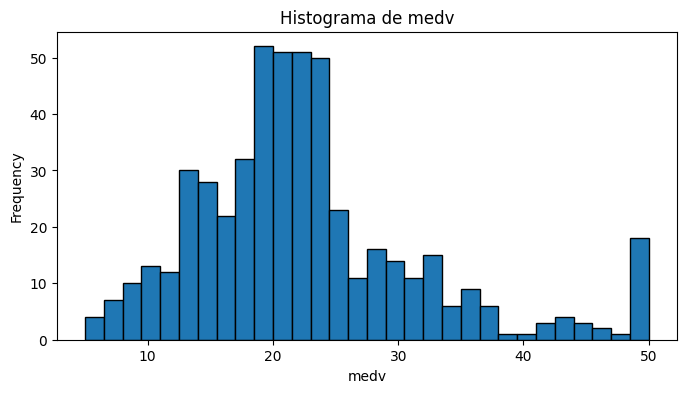

In [59]:
plt.figure(figsize=(8, 4))
plt.hist(Boston['medv'], bins=30, edgecolor='k')
plt.xlabel('medv')
plt.ylabel('Frequency')
plt.title('Histograma de medv')
plt.show()

In [ ]:
Boston.sample(5)
# print(X_train.shape[1])

12


In [61]:
# max_features=X_train.shape[1], passa automaticamente o número de features (nr de colunas do df)
bag_boston = RF(max_features=X_train.shape[1], random_state=0)
bag_boston.fit(X_train, y_train)
y_hat_bag = bag_boston.predict(X_test) # valores previstos


# Calcula o erro quadrático médio (Mean Squared Error - MSE) entre os valores reais (`y_test`) e os valores previstos (`y_hat_bag`). 
print(f'Mean Squared Error: {np.round(np.mean((y_test - y_hat_bag)**2), 3)}') 

Mean Squared Error: 18.707


Text(0, 0.5, 'Valores Reais')

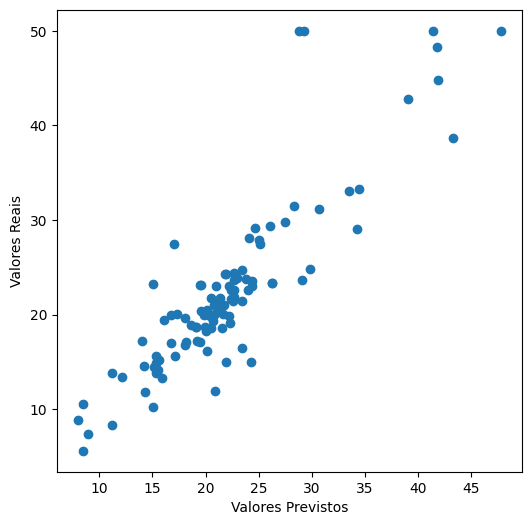

In [62]:
ax = plt.subplots(figsize=(6,6))[1]
ax.scatter(y_hat_bag, y_test)
ax.set_xlabel('Valores Previstos')
ax.set_ylabel('Valores Reais')

In [63]:
bag_boston = RF(max_features=X_train.shape[1], n_estimators=500, random_state=0).fit(X_train, y_train)
y_hat_bag = bag_boston.predict(X_test)

print(f'Mean Squared Error: {np.round(np.mean((y_test - y_hat_bag)**2), 3)}')

Mean Squared Error: 18.796


In [64]:
RF_boston = RF(max_features=6, random_state=0).fit(X_train , y_train)
y_hat_RF = RF_boston.predict(X_test)

print(f'Mean Squared Error: {np.round(np.mean((y_test - y_hat_bag)**2), 3)}')

Mean Squared Error: 18.796


In [ ]:

# Obter as importâncias das features
importances = RF_boston.feature_importances_

# Criar um dataframe para visualizar as importâncias
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotar as importâncias das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [66]:
feature_imp = pd.DataFrame({'importance':RF_boston.feature_importances_}, index=feature_names) 
feature_imp.sort_values(by='importance', ascending=False)

,importance
rm,0.358205
lstat,0.320858
crim,0.067421
ptratio,0.063508
dis,0.052012
indus,0.047403
nox,0.038397
tax,0.023897
age,0.020343
rad,0.004142


In [ ]:
boost_boston = GBR(n_estimators=5000, learning_rate=0.001, max_depth=3, random_state=0)
boost_boston.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=5000,
                          random_state=0)

In [ ]:
test_error = np.zeros_like(boost_boston.train_score_)
for idx , y_ in enumerate(boost_boston.staged_predict(X_test)):
    test_error[idx] = np.mean((y_test - y_)**2)

plot_idx = np.arange(boost_boston.train_score_.shape[0])
ax = plt.subplots(figsize=(6,6))[1]
ax.plot(plot_idx, boost_boston.train_score_, 'b', label='Training')
ax.plot(plot_idx, test_error, 'r', label='Test')
ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Mean Squared Error')
ax.legend()
ax.set_yticks(np.arange(0, max(boost_boston.train_score_.max(), test_error.max()) + 5, 5))

In [69]:
y_hat_boost = boost_boston.predict(X_test);

print(f'Mean Squared Error: {np.round(np.mean((y_test - y_hat_boost)**2), 3)}')

Mean Squared Error: 18.662


In [ ]:
boost_boston = GBR(n_estimators=700, learning_rate=0.25, max_depth=3, random_state=0)
# boost_boston = GBR(n_estimators=7000, learning_rate=0.0005, max_depth=3, random_state=0)
# boost_boston = GBR(n_estimators=5000, learning_rate=0.25, max_depth=3, random_state=0)
# boost_boston = GBR(n_estimators=5000, learning_rate=0.001, max_depth=3, subsample=0.8, min_samples_split=5, min_samples_leaf=3, random_state=0)

boost_boston.fit(X_train, y_train)
y_hat_boost = boost_boston.predict(X_test);
print(f'Mean Squared Error: {np.round(np.mean((y_test - y_hat_boost)**2), 3)}')

Mean Squared Error: 13.135


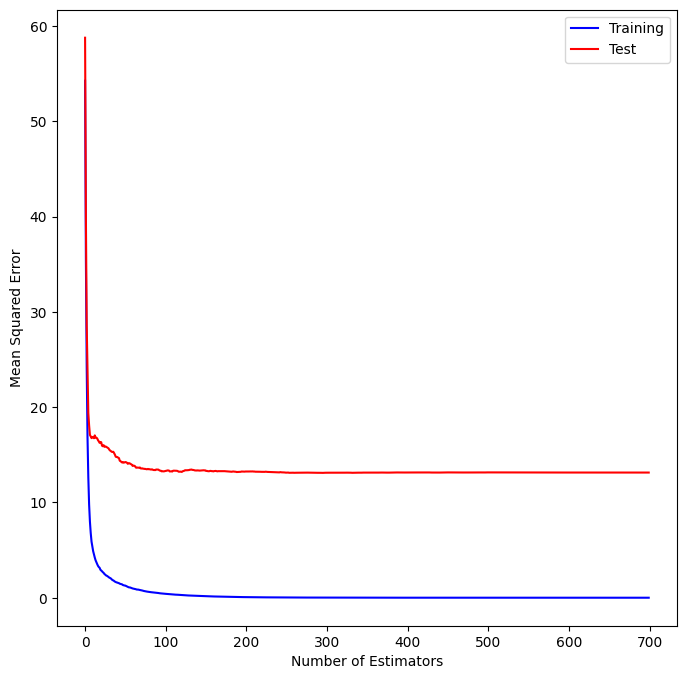

In [33]:
test_error = np.zeros_like(boost_boston.train_score_)
for idx, y_ in enumerate(boost_boston.staged_predict(X_test)):
    test_error[idx] = np.mean((y_test - y_)**2)

plot_idx = np.arange(boost_boston.train_score_.shape[0])
ax = plt.subplots(figsize=(8, 8))[1]
ax.plot(plot_idx, boost_boston.train_score_, 'b', label='Training')
ax.plot(plot_idx, test_error, 'r', label='Test')
ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Mean Squared Error')
ax.legend()

In [102]:
feature_imp = pd.DataFrame({'importance':boost_boston.feature_importances_}, index=feature_names) 
feature_imp.sort_values(by='importance', ascending=False)

,importance
lstat,0.499920
rm,0.314771
ptratio,0.055593
dis,0.051430
crim,0.032254
nox,0.023597
tax,0.012304
age,0.005000
indus,0.003105
rad,0.001882


Cross-validation para ver o melhor n_estimators (procedimento de alto custo computacional)

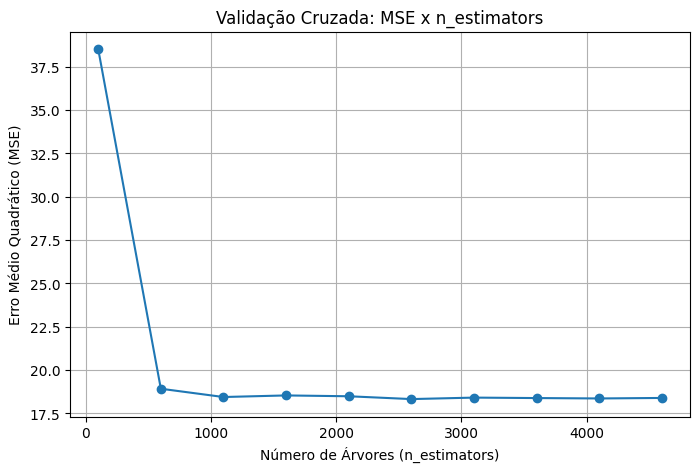

In [7]:
n_estimators_range = range(100, 5100, 500)  # Testar de 100 até 5000, de 500 em 500
cv_scores = []

for n in n_estimators_range:
    model = GBR(
        n_estimators=n,
        learning_rate=0.01,     # Mantém um learning rate pequeno
        max_depth=3,
        random_state=0
    )
    # Validar usando 5 folds e pegar o MSE (negativo, por isso o sinal)
    mse = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    cv_scores.append(mse)

# Plotar curva de erro
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.xlabel('Número de Árvores (n_estimators)')
plt.ylabel('Erro Médio Quadrático (MSE)')
plt.title('Validação Cruzada: MSE x n_estimators')
plt.grid(True)
plt.show()

Otimização de Hiper-parametros (GridSearch)

In [36]:
param_grid = {
    'n_estimators': [500, 700, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.25],
    'max_depth': [2, 3, 4, 5]
}

boost = GBR(random_state=0)

# Grid Search com 5 folds de validação cruzada
grid_search = GridSearchCV(
    estimator=boost,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,  # Usa todos os núcleos da máquina
    verbose=1
)

grid_search.fit(X, y)

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

print("\nMelhor MSE (negativo):")
print(grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Melhores parâmetros encontrados:
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}

Melhor MSE (negativo):
-18.15837901430224
